In [1]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:

X_train = pd.read_csv('X_train.csv', header=None)
Y_train = pd.read_csv('Y_train.csv', header=None)
X_test = pd.read_csv('X_test.csv', header=None)
Y_test = pd.read_csv('Y_test.csv', header=None)


print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")


X_train shape: (1000, 610)
Y_train shape: (610, 1)
X_test shape: (1000, 600)
Y_test shape: (600, 1)


In [3]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)


X_train shape: (1000, 610)
Y_train shape: (610, 1)


In [4]:
X_train = X_train.T
X_test = X_test.T

In [5]:
from sklearn.preprocessing import StandardScaler

# تعریف اسکیلر
scaler = StandardScaler()

# انجام استانداردسازی روی داده‌های آموزشی
X_train_scaled = scaler.fit_transform(X_train)
test_scaler= StandardScaler()
# انجام استانداردسازی روی داده‌های تست (با استفاده از پارامترهای اسکیلر آموزش‌داده‌شده)
X_test_scaled = test_scaler.fit_transform(X_test)
X_train = X_train_scaled
X_test = X_test_scaled

In [6]:
print("X_train shape:", X_train.shape)

X_train shape: (610, 1000)


SVM Overall Accuracy: 0.665
SVM Category Accuracies: {'Far-Body': 0.6133333333333333, 'Head': 0.6333333333333333, 'Middle-Body': 0.6733333333333333, 'Near-Body': 0.74}
SVM Confusion Matrix:
[[213  87]
 [114 186]]


c:\Users\IT CITY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLP Overall Accuracy: 0.71
MLP Category Accuracies: {'Far-Body': 0.6733333333333333, 'Head': 0.7066666666666667, 'Middle-Body': 0.7066666666666667, 'Near-Body': 0.7533333333333333}
MLP Confusion Matrix:
[[219  81]
 [ 93 207]]


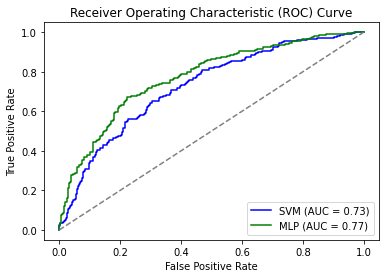

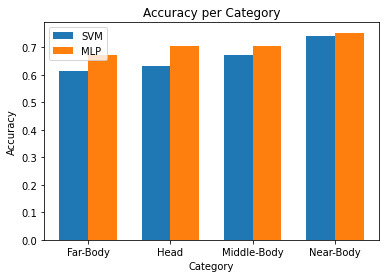

SVM (RBF Kernel) Accuracy: 0.6516666666666666


c:\Users\IT CITY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLP (Deeper Network) Accuracy: 0.6666666666666666


In [7]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# تعریف دسته‌ها
categories = {"Far-Body": list(range(0, 75)) + list(range(300, 375)),
              "Head": list(range(75, 150)) + list(range(375, 450)),
              "Middle-Body": list(range(150, 225)) + list(range(450, 525)),
              "Near-Body": list(range(225, 300)) + list(range(525, 600))}

# 1. SVM
svm = SVC(kernel='linear', probability=True)  # انتخاب کرنل خطی برای SVM
svm.fit(X_train, Y_train.values.ravel())  # آموزش مدل SVM

# پیش‌بینی با تست دیتا
Y_pred_svm = svm.predict(X_test)

# محاسبه Accuracy کلی برای SVM
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
print(f"SVM Overall Accuracy: {accuracy_svm}")

# محاسبه Accuracy برای هر دسته
category_accuracies_svm = {}
for category, indices in categories.items():
    category_accuracies_svm[category] = accuracy_score(Y_test.to_numpy().ravel()[indices], Y_pred_svm.ravel()[indices])
print("SVM Category Accuracies:", category_accuracies_svm)

# محاسبه Confusion Matrix برای SVM
cm_svm = confusion_matrix(Y_test, Y_pred_svm)
print("SVM Confusion Matrix:")
print(cm_svm)

# محاسبه ROC و AUC برای SVM
fpr_svm, tpr_svm, _ = roc_curve(Y_test, svm.decision_function(X_test))
roc_auc_svm = auc(fpr_svm, tpr_svm)

# 2. MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, activation='relu')  # شبکه عصبی چند لایه
mlp.fit(X_train, Y_train)  # آموزش مدل MLP

# پیش‌بینی با تست دیتا
Y_pred_mlp = mlp.predict(X_test)

# محاسبه Accuracy کلی برای MLP
accuracy_mlp = accuracy_score(Y_test, Y_pred_mlp)
print(f"MLP Overall Accuracy: {accuracy_mlp}")

# محاسبه Accuracy برای هر دسته
category_accuracies_mlp = {}
for category, indices in categories.items():
    category_accuracies_mlp[category] = accuracy_score(Y_test.to_numpy().ravel()[indices], Y_pred_mlp.ravel()[indices])
print("MLP Category Accuracies:", category_accuracies_mlp)

# محاسبه Confusion Matrix برای MLP
cm_mlp = confusion_matrix(Y_test, Y_pred_mlp)
print("MLP Confusion Matrix:")
print(cm_mlp)

# محاسبه ROC و AUC برای MLP
fpr_mlp, tpr_mlp, _ = roc_curve(Y_test, mlp.predict_proba(X_test)[:, 1])
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# نمایش ROC Curve
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='blue', label=f"SVM (AUC = {roc_auc_svm:.2f})")
plt.plot(fpr_mlp, tpr_mlp, color='green', label=f"MLP (AUC = {roc_auc_mlp:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# نمایش نمودار Accuracy برای هر دسته
x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, category_accuracies_svm.values(), width, label='SVM')
rects2 = ax.bar(x + width/2, category_accuracies_mlp.values(), width, label='MLP')

ax.set_xlabel('Category')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy per Category')
ax.set_xticks(x)
ax.set_xticklabels(categories.keys())
ax.legend()
plt.show()

# بررسی تأثیر تغییر هایپرپارامترها
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train, Y_train.values.ravel())
accuracy_svm_rbf = accuracy_score(Y_test, svm_rbf.predict(X_test))
print(f"SVM (RBF Kernel) Accuracy: {accuracy_svm_rbf}")

mlp_deep = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, activation='relu')
mlp_deep.fit(X_train, Y_train)
accuracy_mlp_deep = accuracy_score(Y_test, mlp_deep.predict(X_test))
print(f"MLP (Deeper Network) Accuracy: {accuracy_mlp_deep}")


        Model  Accuracy       AUC         Confusion Matrix
0  SVM (Full)  0.665000  0.725378  [[213, 87], [114, 186]]
1  MLP (Full)  0.696667  0.760689  [[218, 82], [100, 200]]
2   SVM (PCA)  0.675000  0.731878  [[219, 81], [114, 186]]
3   MLP (PCA)  0.705000  0.757200  [[226, 74], [103, 197]]


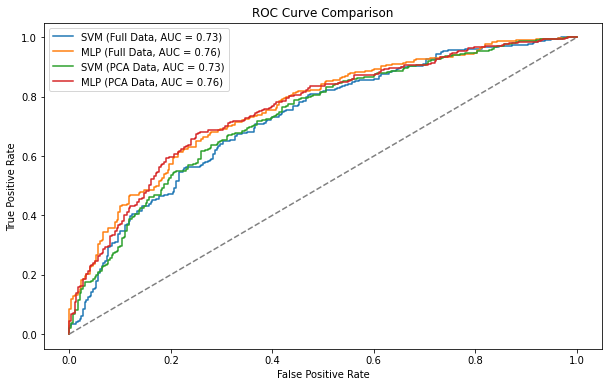

In [8]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# 1. اعمال PCA برای داده‌های C2 و حفظ 95% از واریانس
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 2. آموزش و تست مدل‌ها برای داده‌های اصلی (بدون PCA)

# SVM - داده‌های اصلی
svm = SVC(kernel='linear')
svm.fit(X_train, Y_train.values.ravel())
Y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
cm_svm = confusion_matrix(Y_test, Y_pred_svm)
fpr_svm, tpr_svm, _ = roc_curve(Y_test, svm.decision_function(X_test))
roc_auc_svm = auc(fpr_svm, tpr_svm)

# MLP - داده‌های اصلی
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(X_train, Y_train.values.ravel())
Y_pred_mlp = mlp.predict(X_test)
accuracy_mlp = accuracy_score(Y_test, Y_pred_mlp)
cm_mlp = confusion_matrix(Y_test, Y_pred_mlp)
fpr_mlp, tpr_mlp, _ = roc_curve(Y_test, mlp.predict_proba(X_test)[:, 1])
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# 3. آموزش و تست مدل‌ها برای داده‌های PCA شده

# SVM - داده‌های PCA شده
svm_pca = SVC(kernel='linear')
svm_pca.fit(X_train_pca, Y_train.values.ravel())
Y_pred_svm_pca = svm_pca.predict(X_test_pca)
accuracy_svm_pca = accuracy_score(Y_test, Y_pred_svm_pca)
cm_svm_pca = confusion_matrix(Y_test, Y_pred_svm_pca)
fpr_svm_pca, tpr_svm_pca, _ = roc_curve(Y_test, svm_pca.decision_function(X_test_pca))
roc_auc_svm_pca = auc(fpr_svm_pca, tpr_svm_pca)

# MLP - داده‌های PCA شده
mlp_pca = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp_pca.fit(X_train_pca, Y_train.values.ravel())
Y_pred_mlp_pca = mlp_pca.predict(X_test_pca)
accuracy_mlp_pca = accuracy_score(Y_test, Y_pred_mlp_pca)
cm_mlp_pca = confusion_matrix(Y_test, Y_pred_mlp_pca)
fpr_mlp_pca, tpr_mlp_pca, _ = roc_curve(Y_test, mlp_pca.predict_proba(X_test_pca)[:, 1])
roc_auc_mlp_pca = auc(fpr_mlp_pca, tpr_mlp_pca)

# 4. مقایسه نتایج

# ایجاد DataFrame برای مقایسه نتایج
comparison_df = pd.DataFrame({
    'Model': ['SVM (Full)', 'MLP (Full)', 'SVM (PCA)', 'MLP (PCA)'],
    'Accuracy': [accuracy_svm, accuracy_mlp, accuracy_svm_pca, accuracy_mlp_pca],
    'AUC': [roc_auc_svm, roc_auc_mlp, roc_auc_svm_pca, roc_auc_mlp_pca],
    'Confusion Matrix': [cm_svm, cm_mlp, cm_svm_pca, cm_mlp_pca]
})

# چاپ جدول مقایسه
print(comparison_df)

# رسم ROC curve برای SVM و MLP در داده‌های اصلی و PCA شده
plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (Full Data, AUC = {roc_auc_svm:.2f})")
plt.plot(fpr_mlp, tpr_mlp, label=f"MLP (Full Data, AUC = {roc_auc_mlp:.2f})")
plt.plot(fpr_svm_pca, tpr_svm_pca, label=f"SVM (PCA Data, AUC = {roc_auc_svm_pca:.2f})")
plt.plot(fpr_mlp_pca, tpr_mlp_pca, label=f"MLP (PCA Data, AUC = {roc_auc_mlp_pca:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # خط مرجع برای تصادفی بودن
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


Mean Confidence for SVM: 0.6183530643986799
Mean Confidence for MLP: 0.8290540982017164


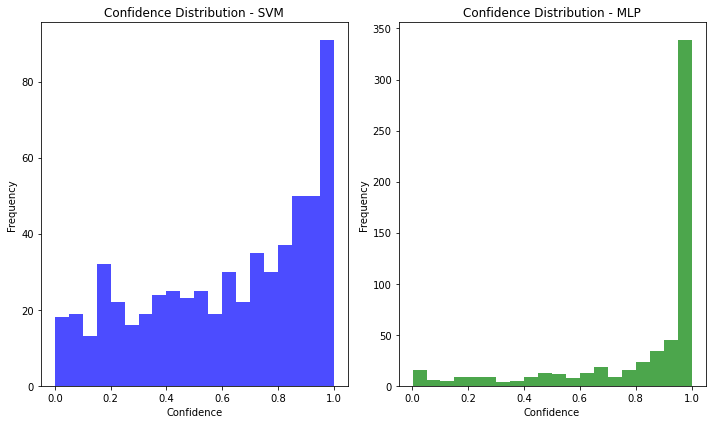

Mean Confidence for SVM (PCA): 0.6152712869904025
Mean Confidence for MLP (PCA): 0.8333967356726447


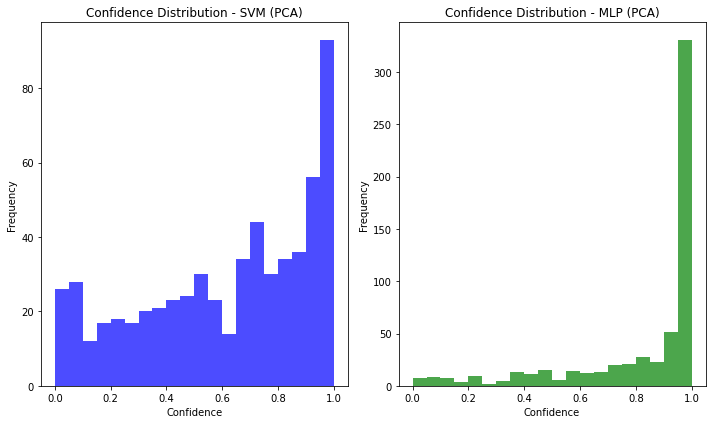

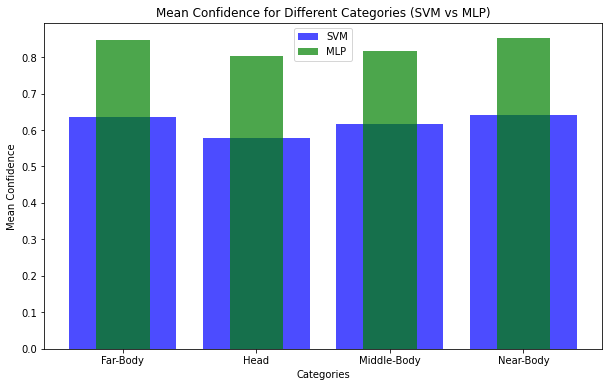

In [9]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data (assuming X_train, X_test, Y_train, Y_test are loaded and preprocessed)

# 1. SVM with probability outputs (probability=True)
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, Y_train.values.ravel())

# Get predicted probabilities for SVM
Y_prob_svm = svm.predict_proba(X_test)

# 2. MLP with probability outputs
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(X_train, Y_train.values.ravel())

# Get predicted probabilities for MLP
Y_prob_mlp = mlp.predict_proba(X_test)

# 3. Calculate Confidence Score (|P(class1) - P(class2)|)
confidence_svm = np.abs(Y_prob_svm[:, 0] - Y_prob_svm[:, 1])  # Absolute difference for SVM
confidence_mlp = np.abs(Y_prob_mlp[:, 0] - Y_prob_mlp[:, 1])  # Absolute difference for MLP

# 4. Mean Confidence Calculation
mean_confidence_svm = np.mean(confidence_svm)
mean_confidence_mlp = np.mean(confidence_mlp)

print(f"Mean Confidence for SVM: {mean_confidence_svm}")
print(f"Mean Confidence for MLP: {mean_confidence_mlp}")

# 5. Plot Confidence Levels for SVM and MLP
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(confidence_svm, bins=20, color='blue', alpha=0.7)
plt.title('Confidence Distribution - SVM')
plt.xlabel('Confidence')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(confidence_mlp, bins=20, color='green', alpha=0.7)
plt.title('Confidence Distribution - MLP')
plt.xlabel('Confidence')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 6. Apply PCA for dimensionality reduction and re-calculate Confidence

# Apply PCA (95% variance retained)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# SVM with PCA
svm_pca = SVC(kernel='linear', probability=True)
svm_pca.fit(X_train_pca, Y_train.values.ravel())
Y_prob_svm_pca = svm_pca.predict_proba(X_test_pca)
confidence_svm_pca = np.abs(Y_prob_svm_pca[:, 0] - Y_prob_svm_pca[:, 1])

# MLP with PCA
mlp_pca = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp_pca.fit(X_train_pca, Y_train.values.ravel())
Y_prob_mlp_pca = mlp_pca.predict_proba(X_test_pca)
confidence_mlp_pca = np.abs(Y_prob_mlp_pca[:, 0] - Y_prob_mlp_pca[:, 1])

# Mean Confidence with PCA
mean_confidence_svm_pca = np.mean(confidence_svm_pca)
mean_confidence_mlp_pca = np.mean(confidence_mlp_pca)

print(f"Mean Confidence for SVM (PCA): {mean_confidence_svm_pca}")
print(f"Mean Confidence for MLP (PCA): {mean_confidence_mlp_pca}")

# Plot Confidence after PCA
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(confidence_svm_pca, bins=20, color='blue', alpha=0.7)
plt.title('Confidence Distribution - SVM (PCA)')
plt.xlabel('Confidence')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(confidence_mlp_pca, bins=20, color='green', alpha=0.7)
plt.title('Confidence Distribution - MLP (PCA)')
plt.xlabel('Confidence')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 7. If specific categories (Head, Near-Body, etc.) exist, calculate confidence for each
# Assuming we have separate categories for the classes (for example, in Y_test categories)
categories = {"Far-Body": list(range(0, 75)) + list(range(300, 375)),
              "Head": list(range(75, 150)) + list(range(375, 450)),
              "Middle-Body": list(range(150, 225)) + list(range(450, 525)),
              "Near-Body": list(range(225, 300)) + list(range(525, 600))}
# Placeholder categories (adjust with actual data structure)

category_confidence_svm = {}
category_confidence_mlp = {}

# Assuming Y_test contains category labels for each sample
for category, indices in categories.items():
    # Filter for the category using the indices
    idx_category = Y_test.index.isin(indices)  # Check if the index of Y_test is in the category's indices

    # Only compute confidence if there are samples for the current category
    if np.sum(idx_category) > 0:  # Check if there are any samples for this category
        # Confidence for SVM
        category_confidence_svm[category] = np.mean(confidence_svm[idx_category])  # Mean confidence for the category

        # Confidence for MLP
        category_confidence_mlp[category] = np.mean(confidence_mlp[idx_category])  # Mean confidence for the category
    else:
        category_confidence_svm[category] = np.nan  # No samples, assign NaN
        category_confidence_mlp[category] = np.nan  # No samples, assign NaN

# Plot confidence for categories
category_names = list(category_confidence_svm.keys())
svm_confidences = list(category_confidence_svm.values())
mlp_confidences = list(category_confidence_mlp.values())

plt.figure(figsize=(10, 6))
plt.bar(category_names, svm_confidences, color='blue', alpha=0.7, label='SVM')
plt.bar(category_names, mlp_confidences, color='green', alpha=0.7, label='MLP', width=0.4)
plt.xlabel('Categories')
plt.ylabel('Mean Confidence')
plt.title('Mean Confidence for Different Categories (SVM vs MLP)')
plt.legend()
plt.show()




Mean Confidence for SVM (PCA): 0.6036946443423366
Mean Confidence for MLP (PCA): 0.8292871572157086


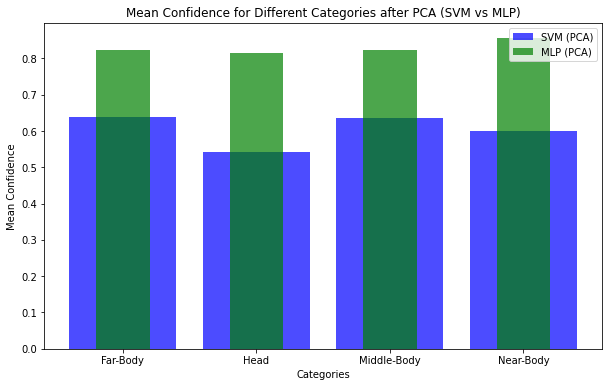

In [10]:
# 6. Apply PCA for dimensionality reduction and re-calculate Confidence for categories

# Apply PCA (95% variance retained)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# SVM with PCA
svm_pca = SVC(kernel='linear', probability=True)
svm_pca.fit(X_train_pca, Y_train.values.ravel())
Y_prob_svm_pca = svm_pca.predict_proba(X_test_pca)
confidence_svm_pca = np.abs(Y_prob_svm_pca[:, 0] - Y_prob_svm_pca[:, 1])

# MLP with PCA
mlp_pca = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp_pca.fit(X_train_pca, Y_train.values.ravel())
Y_prob_mlp_pca = mlp_pca.predict_proba(X_test_pca)
confidence_mlp_pca = np.abs(Y_prob_mlp_pca[:, 0] - Y_prob_mlp_pca[:, 1])

# Mean Confidence with PCA
mean_confidence_svm_pca = np.mean(confidence_svm_pca)
mean_confidence_mlp_pca = np.mean(confidence_mlp_pca)

print(f"Mean Confidence for SVM (PCA): {mean_confidence_svm_pca}")
print(f"Mean Confidence for MLP (PCA): {mean_confidence_mlp_pca}")

# 7. Recalculate and Plot Confidence for Categories with PCA
category_confidence_svm_pca = {}
category_confidence_mlp_pca = {}

# For each category, calculate the confidence after PCA
for category, indices in categories.items():
    # Filter for the category using the indices (same as before)
    idx_category = Y_test.index.isin(indices)  # Check if the index of Y_test is in the category's indices

    # Only compute confidence if there are samples for the current category
    if np.sum(idx_category) > 0:  # Check if there are any samples for this category
        # Confidence for SVM with PCA
        category_confidence_svm_pca[category] = np.mean(confidence_svm_pca[idx_category])  # Mean confidence for the category

        # Confidence for MLP with PCA
        category_confidence_mlp_pca[category] = np.mean(confidence_mlp_pca[idx_category])  # Mean confidence for the category
    else:
        category_confidence_svm_pca[category] = np.nan  # No samples, assign NaN
        category_confidence_mlp_pca[category] = np.nan  # No samples, assign NaN

# Plot confidence for categories after PCA
category_names_pca = list(category_confidence_svm_pca.keys())
svm_confidences_pca = list(category_confidence_svm_pca.values())
mlp_confidences_pca = list(category_confidence_mlp_pca.values())

plt.figure(figsize=(10, 6))
plt.bar(category_names_pca, svm_confidences_pca, color='blue', alpha=0.7, label='SVM (PCA)')
plt.bar(category_names_pca, mlp_confidences_pca, color='green', alpha=0.7, label='MLP (PCA)', width=0.4)
plt.xlabel('Categories')
plt.ylabel('Mean Confidence')
plt.title('Mean Confidence for Different Categories after PCA (SVM vs MLP)')
plt.legend()
plt.show()
